In [51]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict, Counter
import json

In [52]:
with open('arxivData.json', 'r') as fp:
    data_base = json.load(fp)

In [9]:
TARGET_FEATURES = ('cs', 'math', 'physics', 'q-bio', 'q-fin', 'stat', 'econ', 'eess')

In [54]:
def tag_to_major(tag: str) -> str | None:
    if '.' not in tag:
        return None
    major = tag.split('.')[0]

    if major in ('cs', 'math', 'physics', 'q-bio', 'q-fin', 'stat', 'econ', 'eess'):
        return major
    
    if major in ('astro-ph', 'nlin', 'cond-mat'):
        return 'physics'
    
    return None

def parse_sample_majors(sample) -> list[str]:
    # Yes, this is bad, but who stores data as stringified python objects?
    sample_tags = eval(sample['tag'])

    result = set()
    for tag in sample_tags:
        major = tag_to_major(tag['term'])
        if major is not None:
            result.add(major)

    return list(result)

In [55]:
majors_counter = Counter()
majors_per_paper = list()
df_dict = defaultdict(list)
for sample in data_base:
    sample_majors = parse_sample_majors(sample)
    if len(sample_majors) == 0:
        continue
    
    df_dict['id'].append(sample['id'])
    df_dict['abstract'].append(sample['summary'])
    df_dict['title'].append(sample['title'])
    df_dict['majors'].append(sample_majors)

    for major in sample_majors:
        majors_counter[major] += 1
    
    majors_per_paper.append(len(sample_majors))

df = pd.DataFrame(df_dict)

In [56]:
df

,id,abstract,title,majors
0,1802.00209v1,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,"[stat, cs]"
1,1603.03827v1,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,"[stat, cs]"
2,1606.00776v2,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,"[stat, cs]"
3,1705.08142v2,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,"[stat, cs]"
4,1709.02349v2,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,"[stat, cs]"
...,...,...,...,...
40995,1404.4702v2,We study the complexity of learning and approx...,Nearly Tight Bounds on $\ell_1$ Approximation ...,[cs]
40996,1404.5421v1,We consider the problem of multiple users targ...,Concurrent bandits and cognitive radio networks,[cs]
40997,1404.5899v1,"In this paper, we compare and analyze clusteri...",A Comparison of Clustering and Missing Data Me...,"[math, cs]"
40998,1404.6369v1,Cylindrical algebraic decomposition(CAD) is a ...,Applying machine learning to the problem of ch...,[cs]


In [57]:
majors_counter

Counter({'cs': 39251,
         'stat': 10618,
         'math': 2263,
         'physics': 1075,
         'q-bio': 897,
         'eess': 220,
         'q-fin': 66,
         'econ': 13})

In [58]:
Counter(majors_per_paper)

Counter({1: 29896, 2: 8890, 3: 2133, 4: 77, 5: 4})

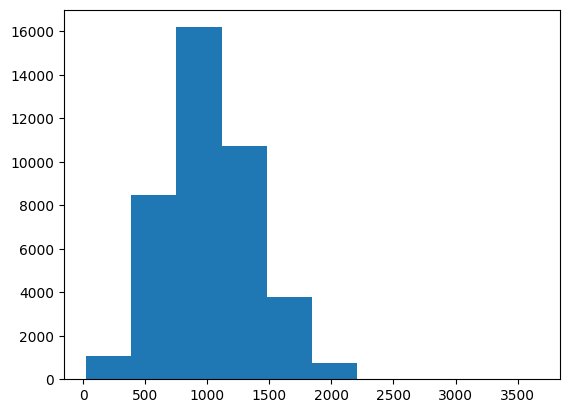

In [59]:
plt.hist(df['abstract'].apply(len))
plt.show();

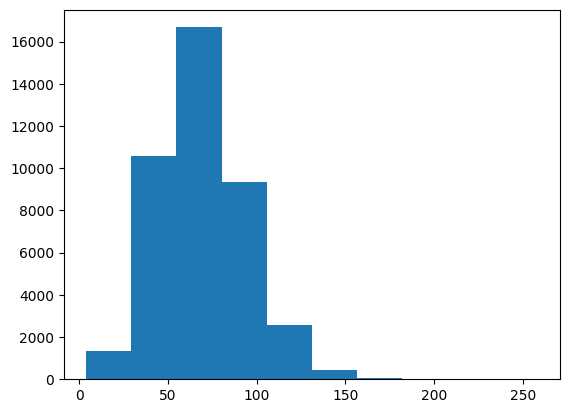

In [60]:
plt.hist(df['title'].apply(len))
plt.show();

In [61]:
df.to_csv('base_data.csv', index=False)

In [62]:
pd.read_csv('base_data.csv')

,id,abstract,title,majors
0,1802.00209v1,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,"['stat', 'cs']"
1,1603.03827v1,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,"['stat', 'cs']"
2,1606.00776v2,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,"['stat', 'cs']"
3,1705.08142v2,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,"['stat', 'cs']"
4,1709.02349v2,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,"['stat', 'cs']"
...,...,...,...,...
40995,1404.4702v2,We study the complexity of learning and approx...,Nearly Tight Bounds on $\ell_1$ Approximation ...,['cs']
40996,1404.5421v1,We consider the problem of multiple users targ...,Concurrent bandits and cognitive radio networks,['cs']
40997,1404.5899v1,"In this paper, we compare and analyze clusteri...",A Comparison of Clustering and Missing Data Me...,"['math', 'cs']"
40998,1404.6369v1,Cylindrical algebraic decomposition(CAD) is a ...,Applying machine learning to the problem of ch...,['cs']
